# Import Required Libraries
Import the necessary libraries, including pandas and networkx.

In [2]:
# Import Required Libraries
import pandas as pd
import networkx as nx

# Load Data
Load the edges, graph indices, and graph labels data from CSV files.

In [3]:
# Load Data
edges_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.edges'
graph_idx_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.graph_idx'
graph_labels_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.graph_labels'

# Load files
edges_df = pd.read_csv(edges_path, header=None, names=['source', 'target'])
graph_idx_df = pd.read_csv(graph_idx_path, header=None, names=['graph_id'])
graph_labels_df = pd.read_csv(graph_labels_path, header=None, names=['label'])

# Inspect Data
Inspect the loaded data using shape, describe, and head methods.

In [4]:
# Inspect the data
print(edges_df.shape)
print(edges_df.describe())
print(edges_df.head())

print(graph_idx_df.shape)
print(graph_idx_df.describe())
print(graph_idx_df.head())

print(graph_labels_df.shape)
print(graph_labels_df.describe())
print(graph_labels_df.head())

(49149990, 2)
             source        target
count  4.914999e+07  4.914999e+07
mean   2.501941e+05  2.501941e+05
std    9.392147e+04  9.392147e+04
min    1.000000e+00  1.000000e+00
25%    2.174150e+05  2.174150e+05
50%    2.682320e+05  2.682320e+05
75%    3.244170e+05  3.244170e+05
max    3.724740e+05  3.724740e+05
   source  target
0       1       2
1       2       1
2       1       3
3       3       1
4       1       4
(372474, 1)
            graph_id
count  372474.000000
mean     2757.371296
std      1484.695077
min         1.000000
25%      1448.000000
50%      2940.000000
75%      4059.000000
max      5000.000000
   graph_id
0         1
1         1
2         1
3         1
4         1
(5000, 1)
             label
count  5000.000000
mean      1.805000
std       0.898408
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000
   label
0      1
1      1
2      1
3      1
4      1


# Create Bipartite Network
Use networkx to create a bipartite graph where one set of nodes represents graph labels and the other set represents graphs.

In [5]:
# Create Bipartite Network
import networkx as nx
from networkx.algorithms import bipartite

# Create a bipartite graph
B = nx.Graph()

label_mapping = {1: 'a', 2: 'c', 3: 'b'}

# Map the labels in the DataFrame
graph_labels_df['label'] = graph_labels_df['label'].map(label_mapping)


# Add nodes with the bipartite attribute
B.add_nodes_from(graph_labels_df['label'], bipartite=0)  # graph labels
B.add_nodes_from(graph_labels_df.index, bipartite=1)  # graphs

# Add edges between graph labels and graphs
for idx, row in graph_labels_df.iterrows():
    graph_id = idx
    label = graph_labels_df.loc[idx, 'label']  # assuming graph_id is 1-based index
    B.add_edge(graph_id , label)

# Check if the graph is bipartite
print("Is the graph bipartite?", bipartite.is_bipartite(B))

# Print the number of nodes and edges
print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

Is the graph bipartite? True
Number of nodes: 5003
Number of edges: 5000


# Visualize Bipartite Network
Visualize the bipartite network using matplotlib or another visualization library.

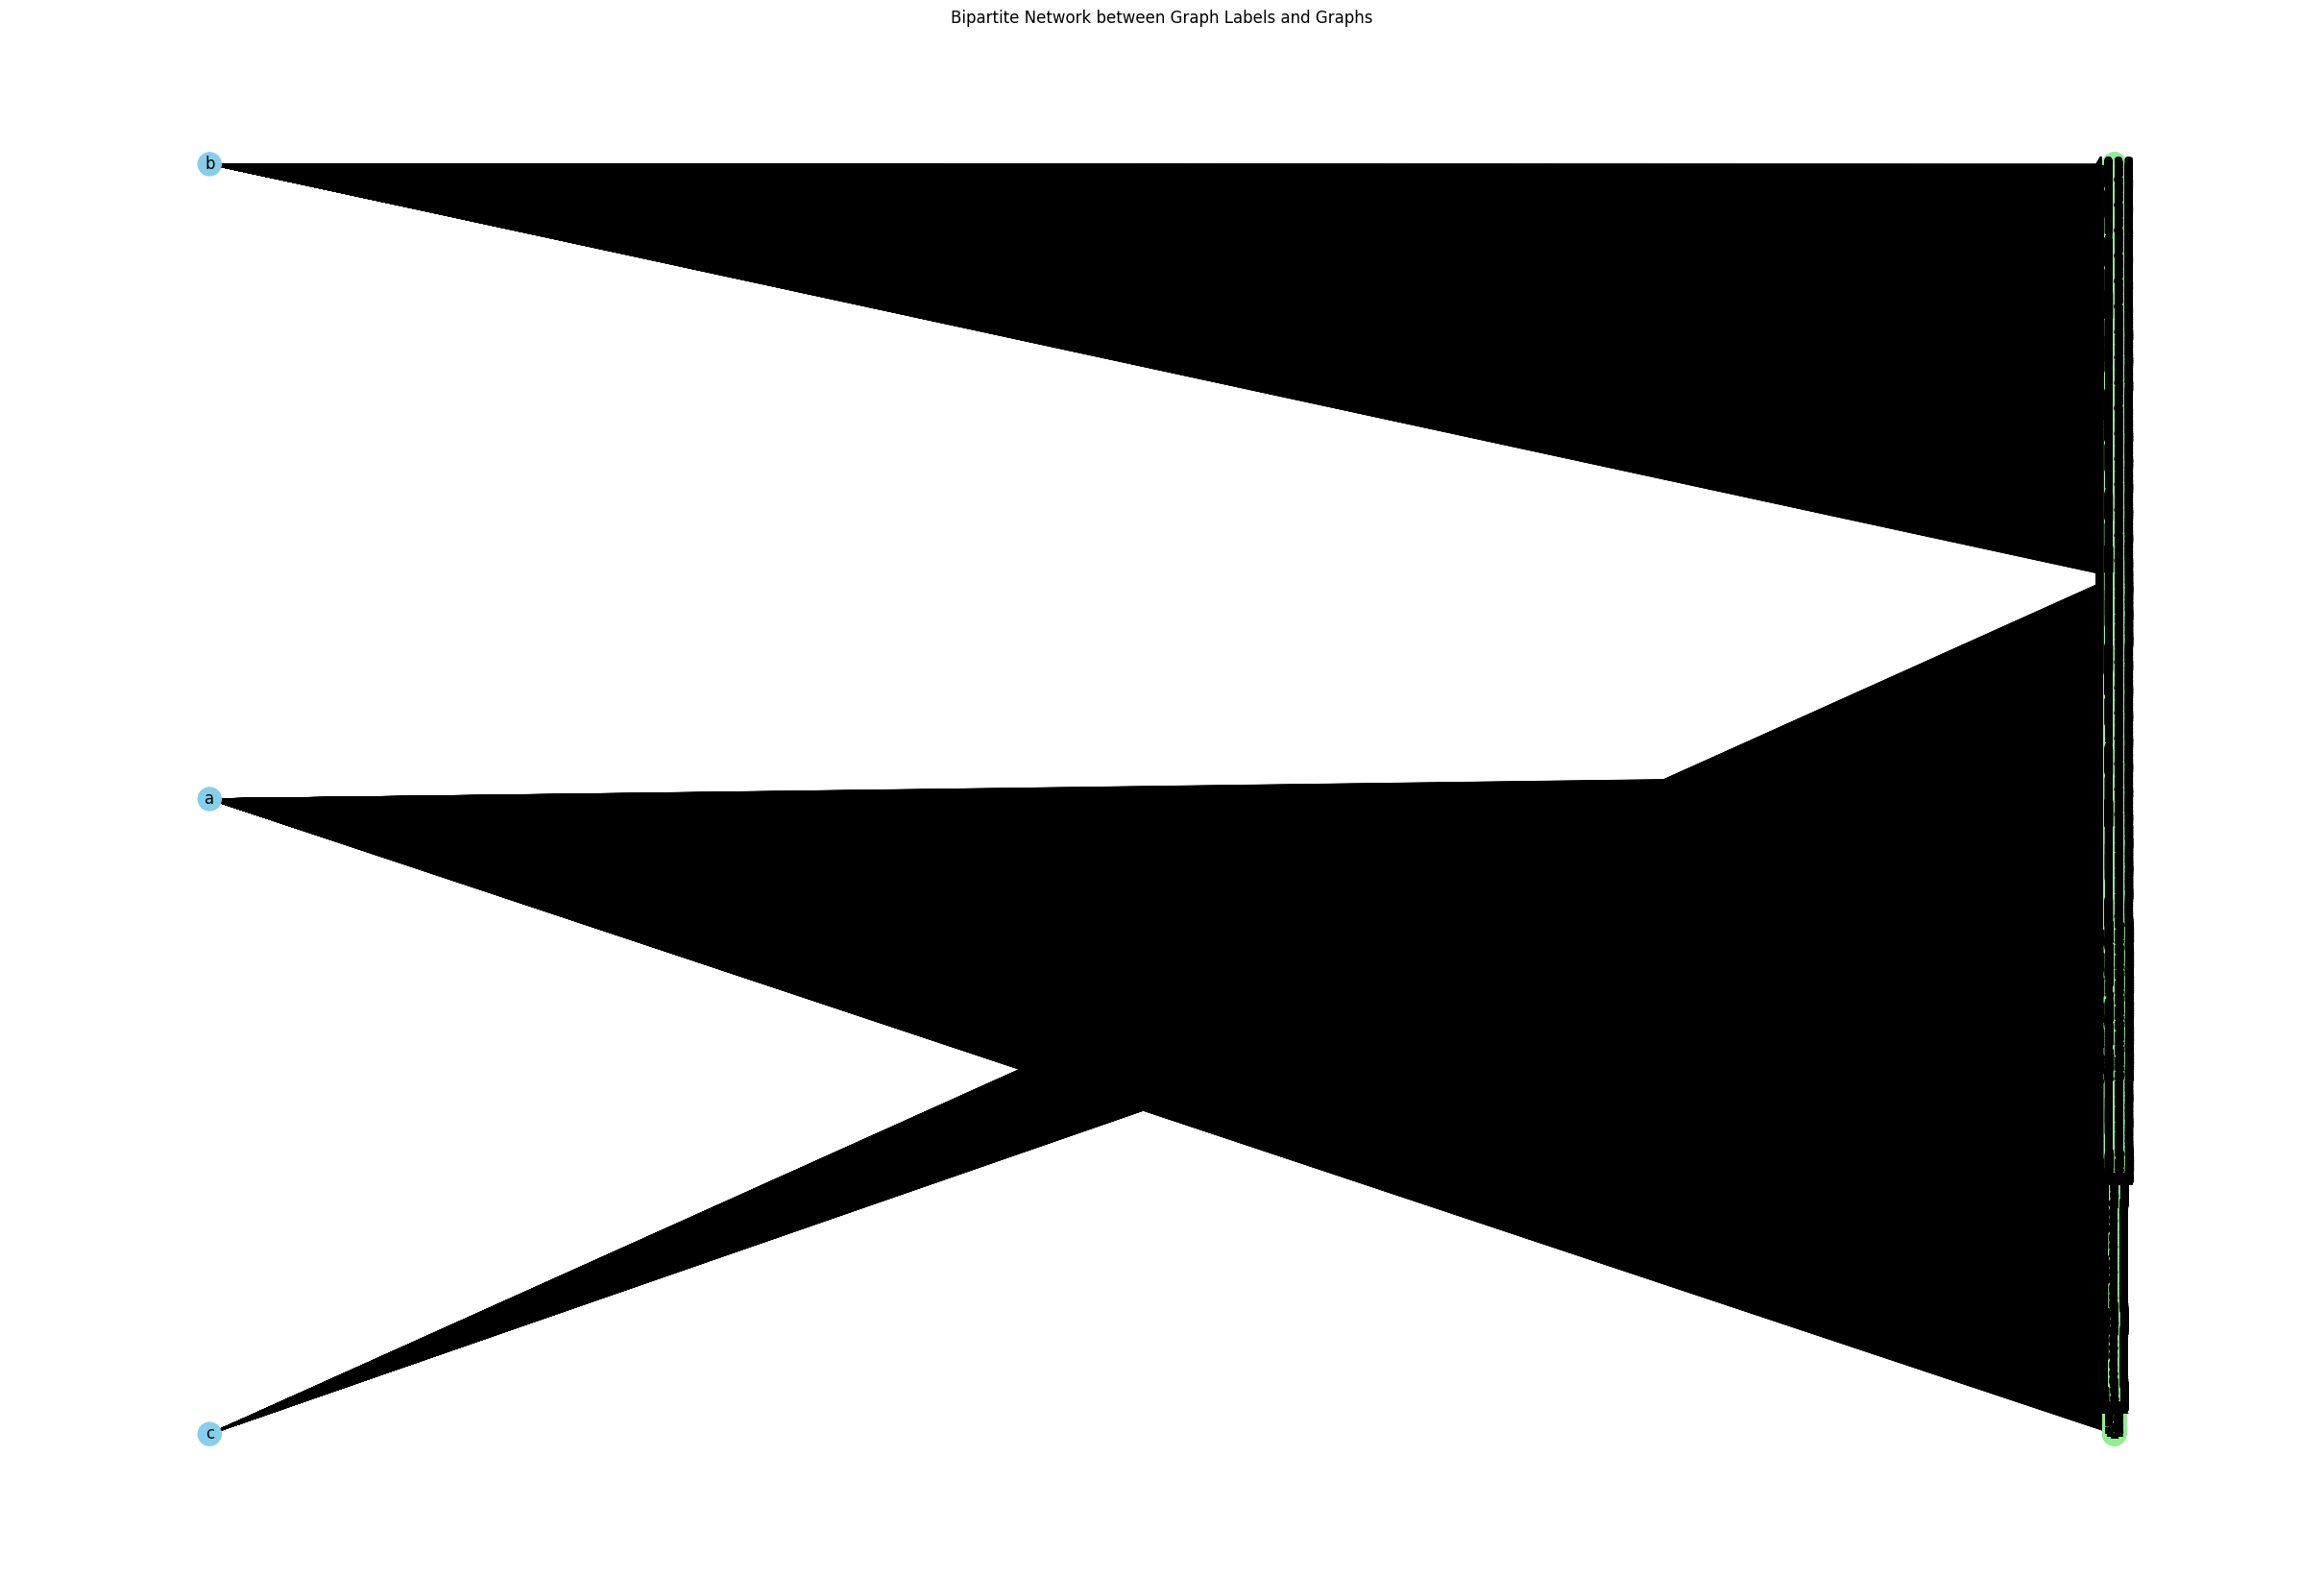

In [6]:
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout

# Separate the nodes by bipartite set
graph_labels_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
graphs_nodes = set(B) - graph_labels_nodes

# Create the layout
pos = bipartite_layout(B, graph_labels_nodes)

# Draw the bipartite graph
plt.figure(figsize=(24, 16))
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if n in graph_labels_nodes else 'lightgreen' for n in B.nodes()])
plt.title("Bipartite Network between Graph Labels and Graphs")
plt.show()

In [7]:
import networkx as nx
from networkx.algorithms import bipartite

# Grado dei nodi
degree_dict = dict(B.degree())
print("Grado dei nodi:", degree_dict)

# Coefficiente di clustering
clustering_coeff = bipartite.clustering(B)
print("Coefficiente di clustering:", clustering_coeff)

# Calcola la degree centrality
degree_centrality = nx.degree_centrality(B)

# Stampa la degree centrality
print("Degree centrality:", degree_centrality)



Grado dei nodi: {'a': 2600, 'c': 775, 'b': 1625, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 

Degree centrality del subgraph: {4609: 0.03125, 4353: 0.03125, 2309: 0.03125, 1670: 0.03125, 3077: 0.03125, 2439: 0.03125, 'b': 0.25, 3729: 0.03125, 913: 0.03125, 1174: 0.03125, 4250: 0.03125, 3867: 0.03125, 1568: 0.03125, 3374: 0.03125, 439: 0.03125, 2745: 0.03125, 4027: 0.03125, 'c': 0.125, 1725: 0.03125, 2237: 0.03125, 'a': 0.5625, 79: 0.03125, 3024: 0.03125, 3794: 0.03125, 851: 0.03125, 476: 0.03125, 1119: 0.03125, 2401: 0.03125, 105: 0.03125, 2282: 0.03125, 2418: 0.03125, 2039: 0.03125, 3705: 0.03125}
Degree centrality del subgraph ordinata: {'a': 0.5625, 'b': 0.25, 'c': 0.125, 4609: 0.03125, 4353: 0.03125, 2309: 0.03125, 1670: 0.03125, 3077: 0.03125, 2439: 0.03125, 3729: 0.03125, 913: 0.03125, 1174: 0.03125, 4250: 0.03125, 3867: 0.03125, 1568: 0.03125, 3374: 0.03125, 439: 0.03125, 2745: 0.03125, 4027: 0.03125, 1725: 0.03125, 2237: 0.03125, 79: 0.03125, 3024: 0.03125, 3794: 0.03125, 851: 0.03125, 476: 0.03125, 1119: 0.03125, 2401: 0.03125, 105: 0.03125, 2282: 0.03125, 2418: 0.0312

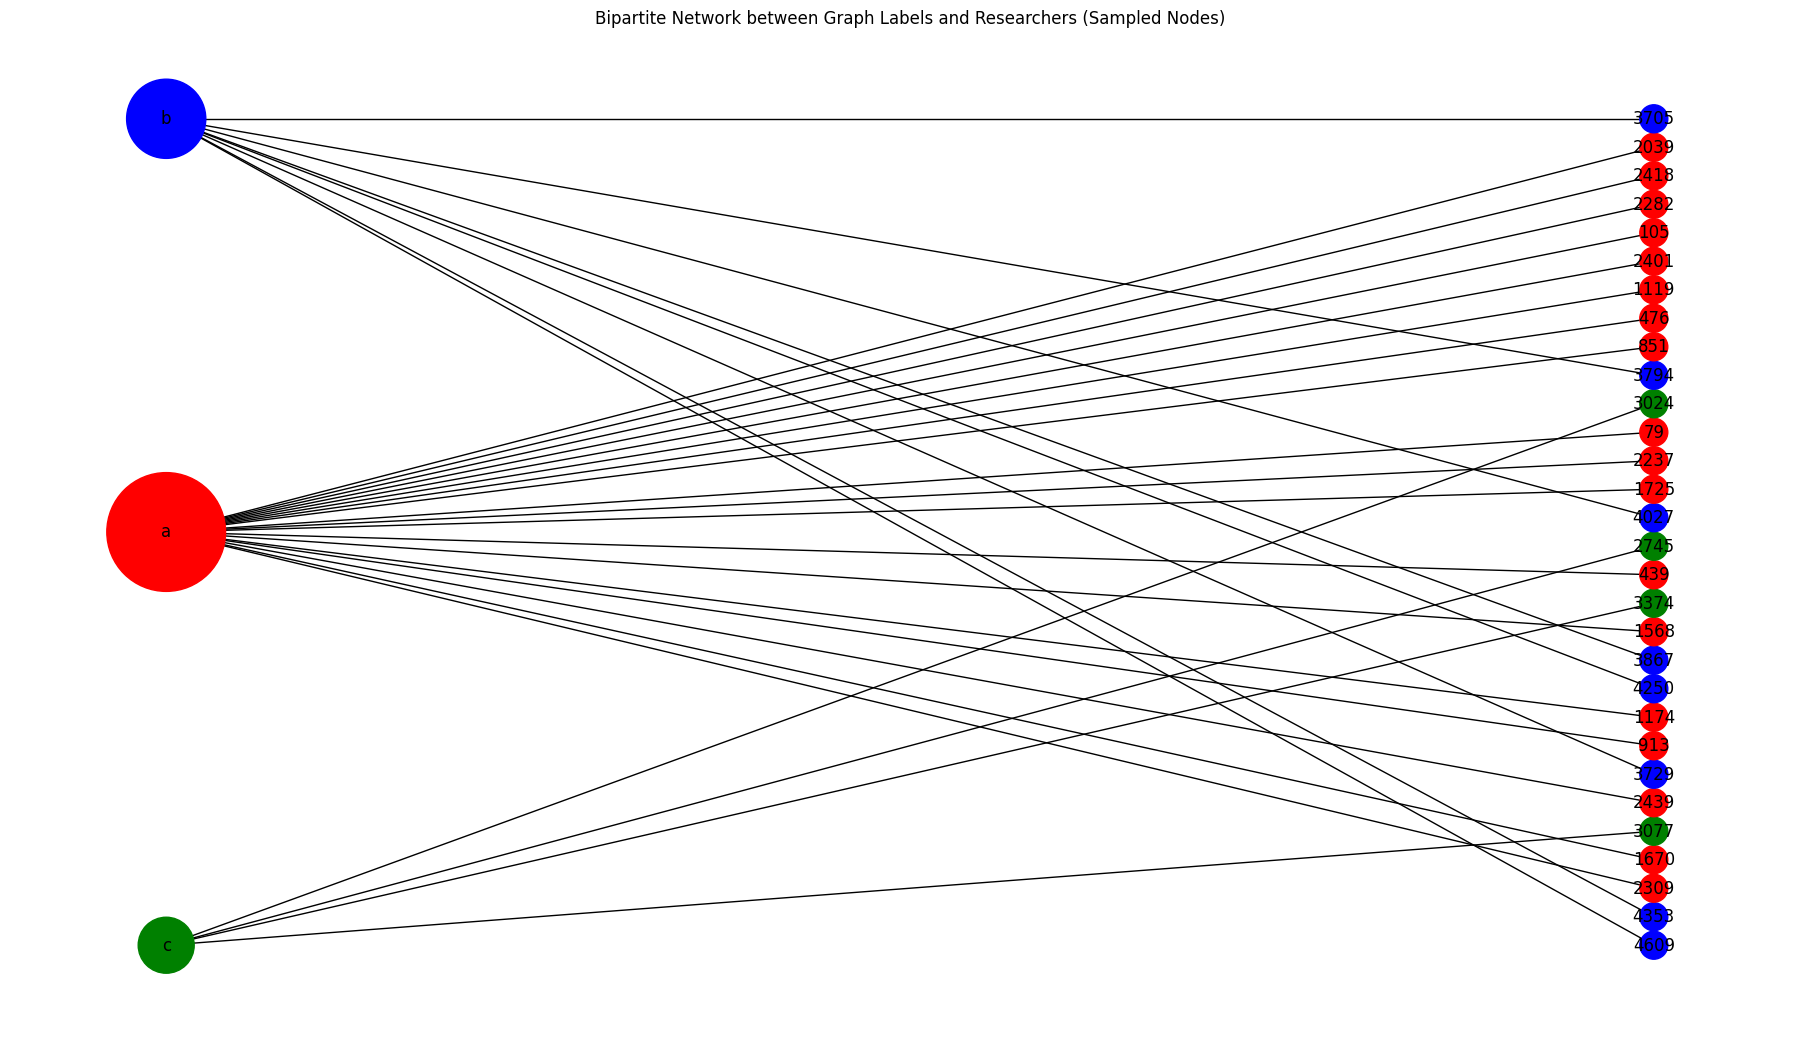

Sampled nodes: [439, 851, 2418, 3077, 105, 476, 3374, 2039, 3794, 1670, 2401, 1725, 3705, 4250, 3729, 2237, 79, 2309, 3867, 1119, 2282, 2439, 4609, 1568, 3024, 4027, 913, 4353, 1174, 2745]


In [8]:
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout
import random
import networkx as nx

# Separate the nodes by bipartite set
graph_labels_nodes = {'a', 'b', 'c'}
graphs_nodes = set(B) - graph_labels_nodes

# Identify nodes connected to 'a' 'b' and 'c'
nodes_connected_to_a = set(B.neighbors('a'))
nodes_connected_to_b = set(B.neighbors('b'))
nodes_connected_to_c = set(B.neighbors('c'))

# Combine the nodes connected to 'a' 'b' and 'c'
combined_nodes = nodes_connected_to_b.union(nodes_connected_to_c).union(nodes_connected_to_a)

# Convert the set to a list
combined_nodes_list = list(combined_nodes)

# Sample 100 nodes from the combined list
sampled_nodes = random.sample(combined_nodes_list, min(30, len(combined_nodes_list)))

# Include the label nodes in the sampled nodes
sampled_nodes_with_labels = set(sampled_nodes).union(graph_labels_nodes)

# Create a subgraph with the sampled nodes and label nodes
subgraph = B.subgraph(sampled_nodes_with_labels)

# Create the layout
pos = bipartite_layout(subgraph, graph_labels_nodes.intersection(subgraph.nodes))

# Aggiungi la degree centrality al subgraph
subgraph_degree_centrality = nx.degree_centrality(subgraph)
print("Degree centrality del subgraph:", subgraph_degree_centrality)

# Ordina il dizionario in base al valore della degree centrality
sorted_subgraph_degree_centrality = dict(sorted(subgraph_degree_centrality.items(), key=lambda item: item[1], reverse=True))
print("Degree centrality del subgraph ordinata:", sorted_subgraph_degree_centrality)

# Define node colors based on labels
node_colors = []
for node in subgraph.nodes():
    if node == 'a':
        node_colors.append('red')
    elif node == 'b':
        node_colors.append('blue')
    elif node == 'c':
        node_colors.append('green')
    else:
        # Determine the color based on the connected label node
        neighbors = list(subgraph.neighbors(node))
        if 'a' in neighbors:
            node_colors.append('red')
        elif 'b' in neighbors:
            node_colors.append('blue')
        elif 'c' in neighbors:
            node_colors.append('green')
        else:
            node_colors.append('lightgreen')

# Draw the bipartite graph
plt.figure(figsize=(18, 10))
nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, node_size=[v * 13000 for v in subgraph_degree_centrality.values()])
plt.title("Bipartite Network between Graph Labels and Researchers (Sampled Nodes)")
plt.show()

# Print the sampled nodes
print("Sampled nodes:", sampled_nodes)

Core nodes: set()
Periphery nodes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

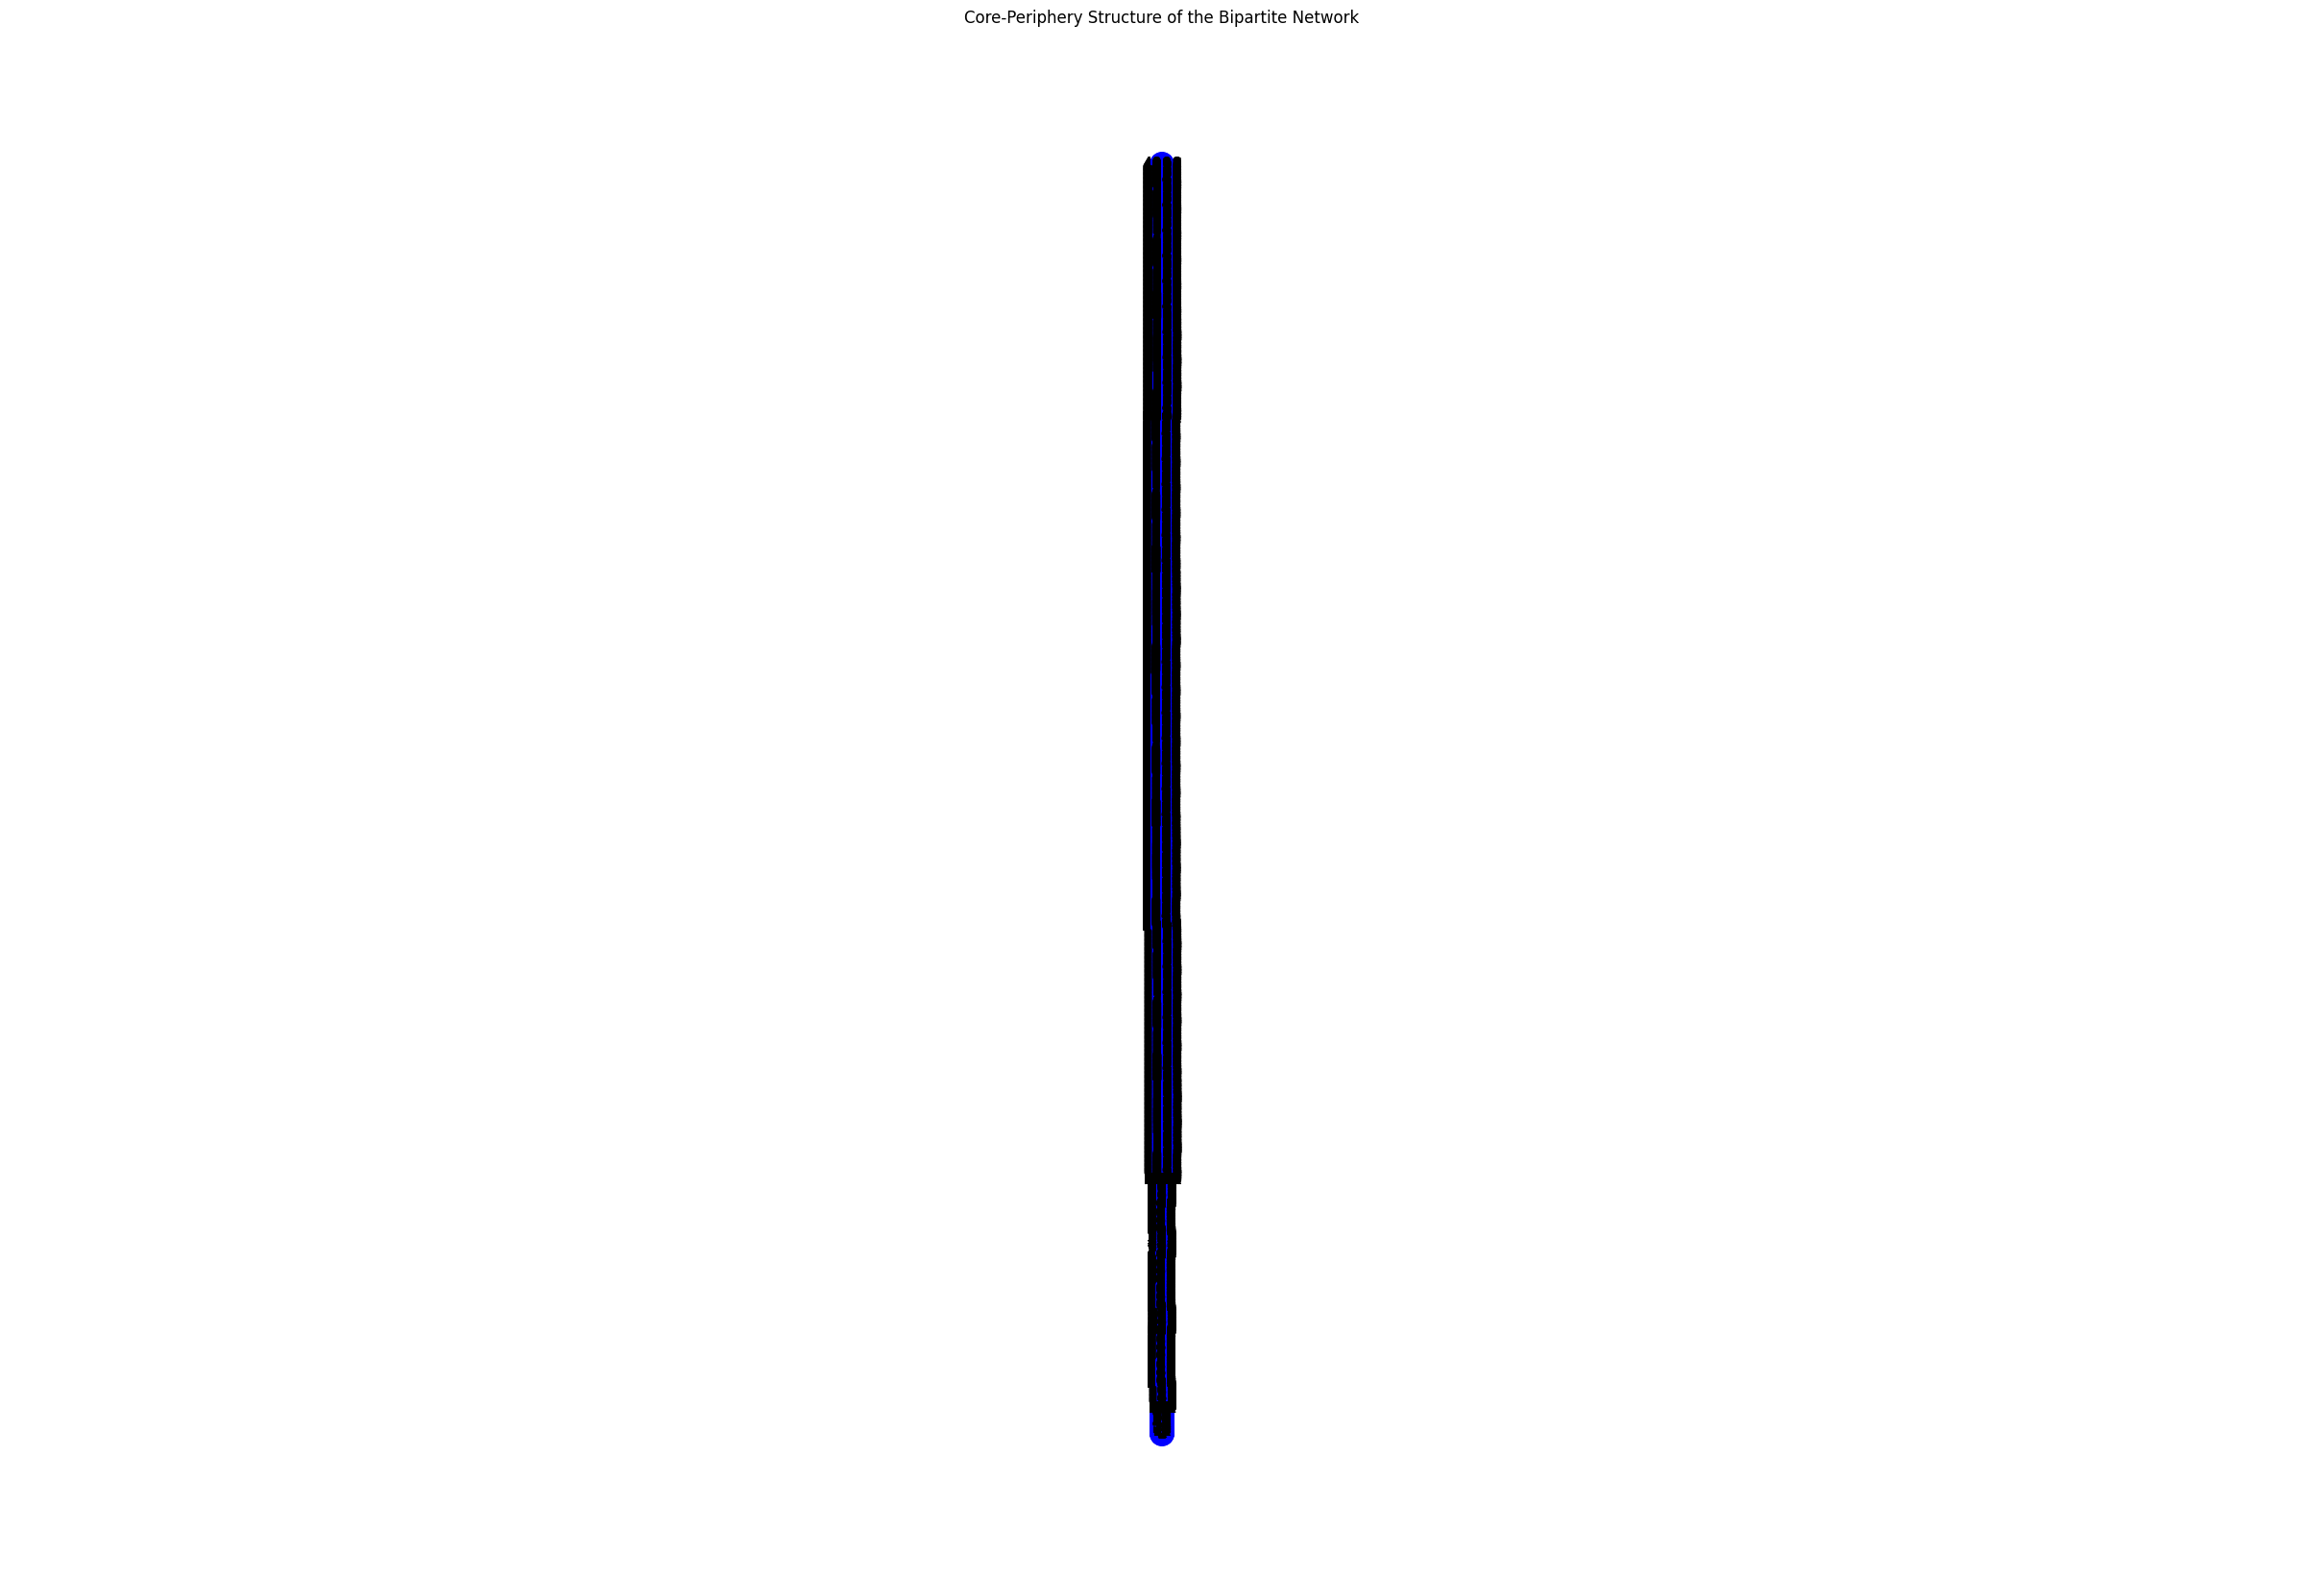

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Assuming B is your bipartite graph
# Compute the core number for each node
core_numbers = nx.core_number(B)

# Separate the nodes by core number
core_nodes = {node for node, core in core_numbers.items() if core > 1}
periphery_nodes = set(B) - core_nodes

# Print core and periphery nodes
print("Core nodes:", core_nodes)
print("Periphery nodes:", periphery_nodes)

# Visualize the core-periphery structure
pos = bipartite_layout(B, core_nodes)

# Define node colors based on core-periphery structure
node_colors = ['red' if node in core_nodes else 'blue' for node in B.nodes()]

plt.figure(figsize=(24, 16))
nx.draw(B, pos, with_labels=True, node_color=node_colors)
plt.title("Core-Periphery Structure of the Bipartite Network")
plt.show()